In [13]:
import numpy as np
import warnings
from sklearn import datasets
from sklearn.model_selection import KFold #you can use kfold for the last question
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.datasets import make_blobs

In [17]:
# Problem 2 and 3) Load dataset, normalize and relabel

with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     # X, y = datasets.load_boston(return_X_y=True)
     cancerData = datasets.load_breast_cancer()
xData = cancerData.data
yTarget = cancerData.target
print(xData.shape, ", ", yTarget.shape)
# print(cancerData.feature_names)

# normalize
scaler = StandardScaler()
xData = scaler.fit_transform(xData)

# relabel target
yTarget[yTarget==0] = -1

# split into train and test
trainX, testX, trainY, testY = train_test_split(xData,yTarget,test_size=0.20,random_state=30)
print(len(trainX),len(testX))
print(len(trainY),len(testY))


(569, 30) ,  (569,)
455 114
455 114


In [18]:
# not part of the assignment, for self learning purposes
from sklearn.linear_model import SGDClassifier
def sgdAutomate(X,y,tX,ty):
    clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.01, max_iter=10000, random_state=25)
    clf.fit(X,y)
    print(clf.intercept_)
    print(clf.coef_)
    ypredicted = clf.predict(tX)

    print('Accuracy:', accuracy_score(ty,ypredicted))
    print('Precision:', precision_score(ty, ypredicted))
    print('Recall:', recall_score(ty, ypredicted))
    print('F1 score:', f1_score(ty, ypredicted))
    print('Confusion matrix:\n', confusion_matrix(ty, ypredicted))
    return

sgdAutomate(trainX,trainY, testX, testY)

[0.26105498]
[[-0.27592266 -0.281681   -0.27286425 -0.28048089  0.00622126  0.2165447
  -0.49044499 -0.45563156  0.21509578  0.20679612 -0.55098051  0.02766381
  -0.32511901 -0.44411119 -0.27836211  0.33509556  0.14616793 -0.17161148
   0.18312765  0.32362991 -0.39583396 -0.50376743 -0.3725897  -0.3950743
  -0.29236141  0.03300378 -0.39895077 -0.28293679 -0.55071439 -0.27886816]]
Accuracy: 0.9736842105263158
Precision: 0.971830985915493
Recall: 0.9857142857142858
F1 score: 0.9787234042553192
Confusion matrix:
 [[42  2]
 [ 1 69]]


In [54]:
# Exercise 4.
def printDecisionFunction(w, b):
    # Extract number of features

    # Build decision function string
    df = f"yPredicted = {b:.4f}"
    for i in range(w.shape[0]):
        df += f" + {w[i]:.4f}*x_{i+1}"

    # Print decision function
    print(df)

def calculateGrad(X,y,w,b, C):
    # weights and bias for the round
    wR = np.zeros(X.shape[1])
    bR = 0
    # for each x
    for ith, ithX in enumerate(X):
        svmCondition = 1-y[ith]*(np.dot(ithX,w)+b)
        #for conditional update of i_th w and b
        w_ith = w
        b_ith = b
        # Update condition
        if max(0,svmCondition)!=0:
            w_ith =w- C*np.dot(ithX,y[ith])
            b_ith =b- C*y[ith]
        wR += w_ith
        bR += b_ith
    #return the average for the round
    return wR/len(y), bR/len(y)


def stochasticGdescentSVM(X,y,C=1,iters = 1000):
    m,n = X.shape
    # learning schedule hyperparameters
    t0,t1=5,50
    # theta hat, weights param
    wHat = np.random.randn(n)
    biasVal = 0
    # gradient descent
    for epoch in range(iters):
        for i in range(m):
            # pick random instances
            r = np.random.randint(m)
            w,b = calculateGrad(X[r:r+10],y[r:r+10],wHat,biasVal,C)
            # learning rate
            eta = t0/(epoch*m+i+t1)
            # update
            wHat -= eta * w
            biasVal -=eta * b
    return wHat, biasVal


def fitSgdSVM(X,y,tX,tY):
    w,b = stochasticGdescentSVM(X,y)
    print(b) 
    print(w)
    # predicted values of y for test
    yP = np.sign(np.dot(tX,w)+b)
    print('Accuracy:', accuracy_score(tY,yP))
    print('Precision:', precision_score(tY,yP))
    print('Recall:', recall_score(tY,yP))
    print('F1 score:', f1_score(tY,yP))
    print('Confusion matrix:\n', confusion_matrix(tY,yP))


    # Compute the closest training examples to the decision boundary
    distances = []
    for i in range(X.shape[0]):
        distance = abs(np.dot(w, X[i]) + b) / np.linalg.norm(w)
        distances.append(distance)

    closest_indices = np.argsort(distances)[:10]

    # Print the closest training examples to the decision boundary
    print("\nIndices of training examples closest to the decision boundary:\n",closest_indices)
    print("Training example closest:")
    print("1.",X[closest_indices[0]])

    # Print decision function
    print("\nDecision function:\n")
    printDecisionFunction(w, b)


fitSgdSVM(trainX,trainY,testX,testY)
    

0.14643436240558994
[-0.10483686 -0.07617664 -0.10499213 -0.10792658 -0.03693054 -0.04841651
 -0.09426144 -0.12170024 -0.03506004  0.03619228 -0.10070511  0.01552348
 -0.08522595 -0.09289781 -0.00846106  0.01687037  0.03407143 -0.00711369
 -0.01733081  0.03347768 -0.13191767 -0.09611396 -0.12763027 -0.12809903
 -0.09132464 -0.07570714 -0.0862041  -0.12244274 -0.1093271  -0.0536872 ]
Accuracy: 0.9649122807017544
Precision: 0.9459459459459459
Recall: 1.0
F1 score: 0.9722222222222222
Confusion matrix:
 [[40  4]
 [ 0 70]]

Indices of training examples closest to the decision boundary:
 [179 383 415 334  57 112 141 223  89 275]
Training example closest:
1. [ 0.32738551  0.72612674  0.28631171  0.15844751 -0.41206792  0.01627962
 -0.44004315 -0.42016194 -0.30893783  0.05279018 -0.72101931 -1.30860175
 -0.75346591 -0.45779131 -1.250377   -0.64430237 -0.4692951  -0.93872957
 -1.06819073 -0.46143027  0.31700405  0.38313509  0.19476326  0.16263658
 -0.09944584  0.481144    0.43567039  0.12171802

# Problem 6. What is the decision function?
=> Decision function = np.sign(w.T.dot(X)+b), where x is the feature vector input, w is the weight vector generated from the model and b is the bias of the generated model. It is printed above as well for the model.

In [31]:
# Problem 7
''' 
Already implemented as such, batches of 10.
'''
# Nevertheless doing k-fold and priting average accuracy and average f1 results
def kFoldSVMtest(X,y,k):
    totalAccuracy = 0
    totalF1 = 0
    # divide data into k folds
    kFoldSet = KFold(n_splits=k, random_state=42,shuffle=True)
    totN = 0
    for i, (trainIndx, testIndx) in enumerate(kFoldSet.split(X)):
        totN = i
        # divide data 
        xTrainSet, xTestSet = X[trainIndx],X[testIndx]
        yTrainSet, yTestSet = y[trainIndx],y[testIndx]
        w,b = stochasticGdescentSVM(xTrainSet,yTrainSet,C=0.01,iters=100) # only 100 iters because it will take long time if more
        # predect 
        yP = np.sign(np.dot(xTestSet,w)+b)
        totalAccuracy += accuracy_score(yTestSet,yP)
        totalF1 +=f1_score(yTestSet,yP)

    totN+=1
    print("Average Accuracy: ",totalAccuracy/totN,"Average F1:", totalF1/totN)
    return

kFoldSVMtest(xData,yTarget,10)


Average Accuracy:  0.9332393483709271 Average F1: 0.9468436170929154


In [51]:
import matplotlib.pyplot as plt

def drawgraph(X, y, w, b):
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y)

    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Set plot parameters
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('SVM Decision Boundary')
    plt.show()


Bias: 2.1002541818364676e-05
Coefficients: [ 0.05266705 -0.08800742]
Accuracy: 0.91
Precision: 0.9183673469387755
Recall: 0.9
F1 score: 0.9090909090909091
Confusion matrix:
 [[92  8]
 [10 90]]


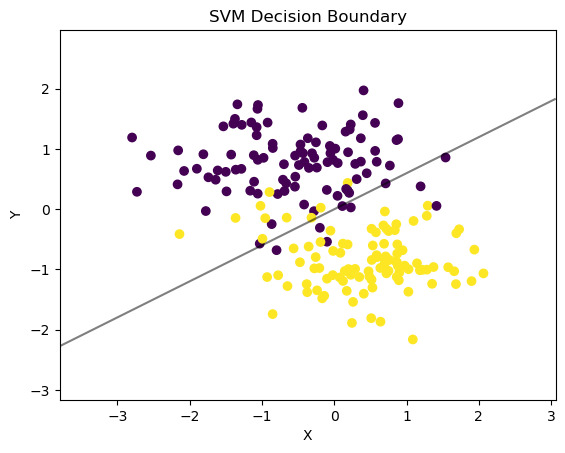

Bias: -0.002091652612594328
Coefficients: [ 0.09075227 -0.09546802]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Confusion matrix:
 [[ 94   0]
 [  0 106]]


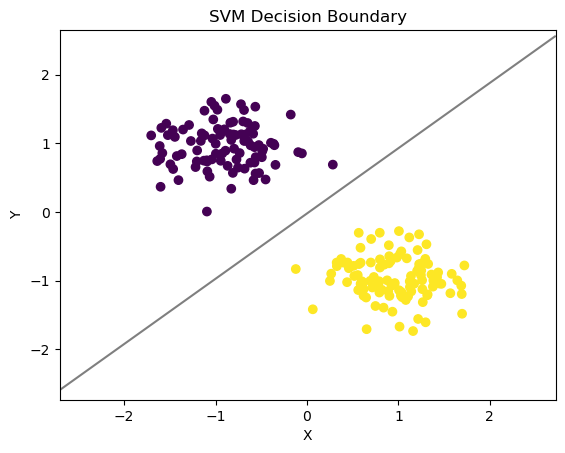

In [52]:
#) training model on synthetic data and visualizing it


def trainNtestSynthetic(rs=0):
    # generate random dataset
    X, y = datasets.make_blobs(n_samples=1000, centers=2, random_state=rs)
    scaler2 = StandardScaler()
    X = scaler2.fit_transform(X)
    y = np.where(y == 0, -1, 1)
    xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=0)
    w,b = stochasticGdescentSVM(xTrain,yTrain,C=0.1,iters = 100)
    print("Bias:",b) 
    print("Coefficients:",w)
    yP = np.sign(np.dot(xTest,w)+b)
    print('Accuracy:', accuracy_score(yTest,yP))
    print('Precision:', precision_score(yTest,yP))
    print('Recall:', recall_score(yTest,yP))
    print('F1 score:', f1_score(yTest,yP))
    print('Confusion matrix:\n', confusion_matrix(yTest,yP))
    drawgraph(xTest,yTest,w,b)
    return

trainNtestSynthetic()
trainNtestSynthetic(18)
